## Observations and Insights 

In [156]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import functools
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "resources/Mouse_metadata.csv"
study_results_path = "resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
Combined_df=pd.merge(mouse_metadata,study_results,how='outer',on="Mouse ID")
# Display the data table for preview
Combined_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [16]:
#check if ther is null value and columns type
Combined_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1893 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Drug Regimen        1893 non-null   object 
 2   Sex                 1893 non-null   object 
 3   Age_months          1893 non-null   int64  
 4   Weight (g)          1893 non-null   int64  
 5   Timepoint           1893 non-null   int64  
 6   Tumor Volume (mm3)  1893 non-null   float64
 7   Metastatic Sites    1893 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 133.1+ KB


In [17]:
# Checking the number of mice.
number_mice=Combined_df['Mouse ID'].nunique()
print(f"There are {number_mice} unique mice IDs.")

There are 249 unique mice IDs.


In [18]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

dup_id=Combined_df.loc[Combined_df.duplicated(subset=['Mouse ID','Timepoint']),'Mouse ID'].unique()
dup_id

array(['g989'], dtype=object)

In [19]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_df=Combined_df.loc[Combined_df['Mouse ID']=='g989']
dup_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [21]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = Combined_df[Combined_df['Mouse ID'].isin(dup_id)==False]


In [23]:
# Checking the number of mice in the clean DataFrame.
number_mice=clean_df['Mouse ID'].nunique()
print(f"Now there are {len(clean_df)} cases with {number_mice} unique mice IDs.")

Now there are 1880 cases with 248 unique mice IDs.


## Summary Statistics

In [24]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
mean_df=clean_df.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
median_df=clean_df.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
variance_df=clean_df.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
std_df=clean_df.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
sem_df=clean_df.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']
summary_table_1=functools.reduce(lambda  left,right: pd.merge(left,right,left_index=True,right_index=True), [mean_df,median_df,variance_df,std_df,sem_df])
summary_table_1.columns=['T_mean','T_median','T_var','T_std','T_sem']
summary_table_1

,T_mean,T_median,T_var,T_std,T_sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [25]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
summary_table_2= clean_df.groupby('Drug Regimen').agg(T_mean=('Tumor Volume (mm3)','mean'),
                                                        T_median=('Tumor Volume (mm3)','median'),                   
                                                        T_var=('Tumor Volume (mm3)','var'),
                                                        T_std=('Tumor Volume (mm3)','std'),
                                                        T_sem=('Tumor Volume (mm3)','sem'))
summary_table_2

,T_mean,T_median,T_var,T_std,T_sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0, 0.5, 'Number of mice tested')

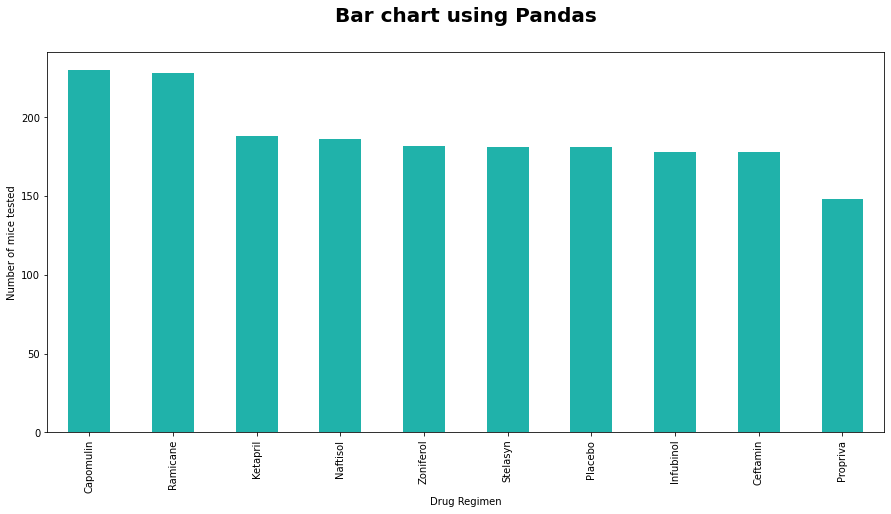

In [175]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
#making a dataframe 
treatment_df=clean_df.groupby('Drug Regimen').count()['Timepoint'].sort_values(ascending=False)
plt.figure(figsize=(15,7))
treatment_df.plot.bar(color='lightseagreen')
plt.title('Bar chart using Pandas',fontsize= 20,pad=30,fontweight="bold")
plt.ylabel('Number of mice tested')

Text(0.5, 1.0, 'Bar chart using matplotlib')

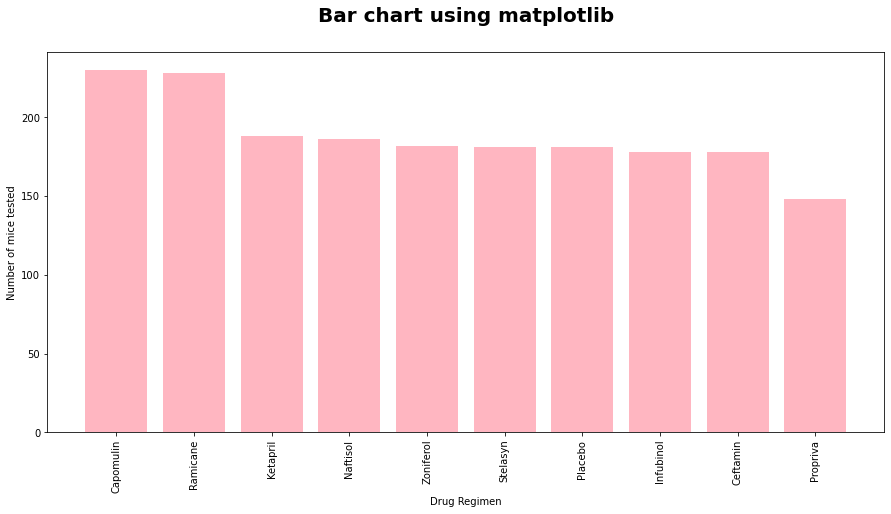

In [173]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
#making a dataseries of number of timepoint per drug
treatment_df=clean_df.groupby('Drug Regimen').count()['Timepoint'].sort_values(ascending=False)
plt.figure(figsize=(15,7))
plt.bar(treatment_df.index,treatment_df,color='lightpink')
plt.xticks(rotation="vertical")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of mice tested")
plt.title('Bar chart using matplotlib',fontsize= 20,pad=30,fontweight="bold")



Text(0.5, 1.0, 'pie chart using Pandas')

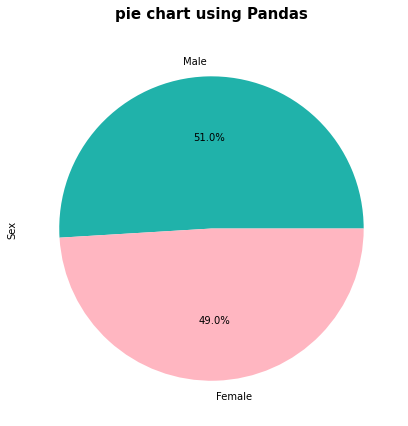

In [176]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
plt.figure(figsize=(15,7))
clean_df['Sex'].value_counts().plot(kind='pie',autopct="%1.1f%%",colors=["lightseagreen","lightpink"])
plt.title('pie chart using Pandas',fontsize= 15,pad=20,fontweight="bold")

Text(0.5, 1.0, 'pie chart using Matplotlib')

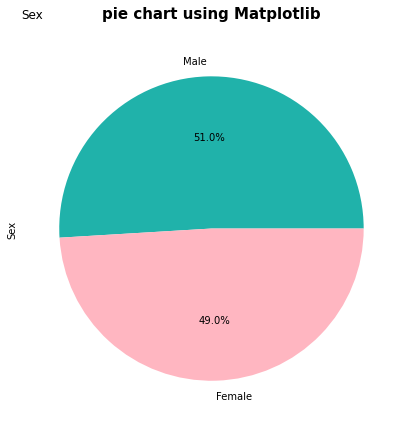

In [177]:
# Generate a pie plot showing the distribution of female versus male mice using matplotlib
sex_df=clean_df['Sex'].value_counts()
plt.figure(figsize=(15,7))
plt.pie(sex_df, labels=sex_df.index, autopct="%1.1f%%", colors=["lightseagreen","lightpink"]);
plt.title('Sex',loc='left')
plt.ylabel('Sex')
plt.title('pie chart using Matplotlib',fontsize= 15,pad=20,fontweight="bold")


## Quartiles, Outliers and Boxplots

In [55]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
max_timepoint_df=clean_df.groupby('Mouse ID').max()['Timepoint']


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
new_Combined_df=pd.merge(clean_df,max_timepoint_df,how='outer',on='Mouse ID')

In [144]:
# Put treatments into a list for for loop (and later for plot labels)
treatments=['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data=[new_Combined_df.loc[(new_Combined_df['Timepoint_x']==new_Combined_df['Timepoint_y'])&(new_Combined_df['Drug Regimen']==i)]['Tumor Volume (mm3)'] for i in treatments]

Capomulin_df=tumor_vol_data[0]
Ramicane_df=tumor_vol_data[1]
Infubinol_df=tumor_vol_data[2]
Ceftamin_df=tumor_vol_data[3]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

def outlier_detecter(df,df_original=clean_df):
    quartiles = df.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    upper_outlier=df.loc[df>upper_bound]
    below_outlier=df.loc[df<lower_bound]
    print(f"The lower quartile of tumor_vol is: {lowerq}")
    print(f"The upper quartile of tumor_vol is: {upperq}")
    print(f"The interquartile range of tumor_vol is: {iqr}")
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")
    if len(list(upper_outlier))==0:
        print("there isn't be an upper_outlier")
    else:
        print(f"there is {len(list(upper_outlier))} upper outlier/outliers in:")
        index_=upper_outlier.index
        return df_original.iloc[index_,:]

    if len(list(below_outlier))==0:
        print("there isn't be an below_outlier")
    else:
        print(f"there is {len(list(below_outlier))} below outlier/outliers in: ")
        index_=below_outlier.index
        return df_original.iloc[index_,:]


    

In [145]:
# Capomulin
outlier_detecter(Capomulin_df)

The lower quartile of tumor_vol is: 32.37735684
The upper quartile of tumor_vol is: 40.1592203
The interquartile range of tumor_vol is: 7.781863460000004
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
there isn't be an upper_outlier
there isn't be an below_outlier


In [146]:
#Ramicane
outlier_detecter(Ramicane_df)

The lower quartile of tumor_vol is: 31.56046955
The upper quartile of tumor_vol is: 40.65900627
The interquartile range of tumor_vol is: 9.098536719999998
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
there isn't be an upper_outlier
there isn't be an below_outlier


In [147]:
#Infubinol
outlier_detecter(Infubinol_df)

The lower quartile of tumor_vol is: 54.04860769
The upper quartile of tumor_vol is: 65.52574285
The interquartile range of tumor_vol is: 11.477135160000003
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.
there isn't be an upper_outlier
there is 1 below outlier/outliers in: 


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
669,c326,Infubinol,Female,18,25,5,36.321346,0


In [148]:
#Ceftamin
outlier_detecter(Ceftamin_df)

The lower quartile of tumor_vol is: 48.72207785
The upper quartile of tumor_vol is: 64.29983003
The interquartile range of tumor_vol is: 15.577752179999997
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.
there isn't be an upper_outlier
there isn't be an below_outlier


Text(0.5, 1.0, 'Final tumor volume of each mouse per treatment')

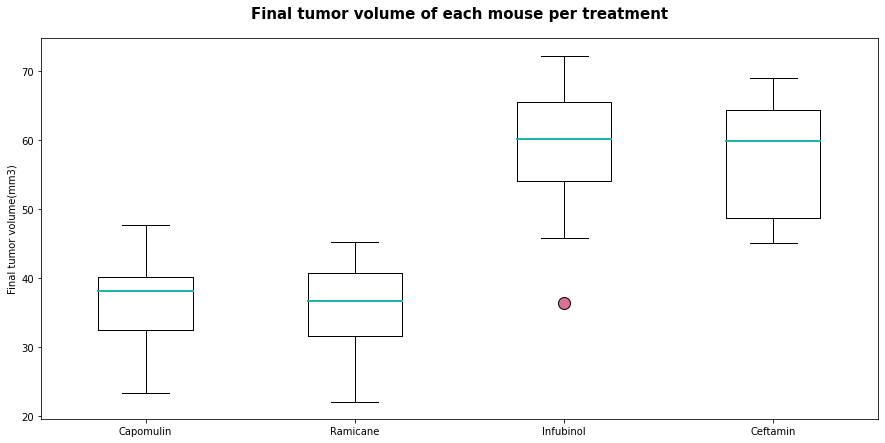

In [172]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
medianprops = dict(linestyle='-', linewidth=2, color='lightseagreen')
flierprops = dict(marker='o', markerfacecolor='palevioletred', markersize=12,
                  markeredgecolor='black')
plt.figure(figsize=(15,7))
plt.boxplot(tumor_vol_data, labels=treatments,flierprops=flierprops, medianprops=medianprops);
plt.ylabel("Final tumor volume(mm3)")
plt.title('Final tumor volume of each mouse per treatment',fontsize= 15,pad=20,fontweight="bold")


## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

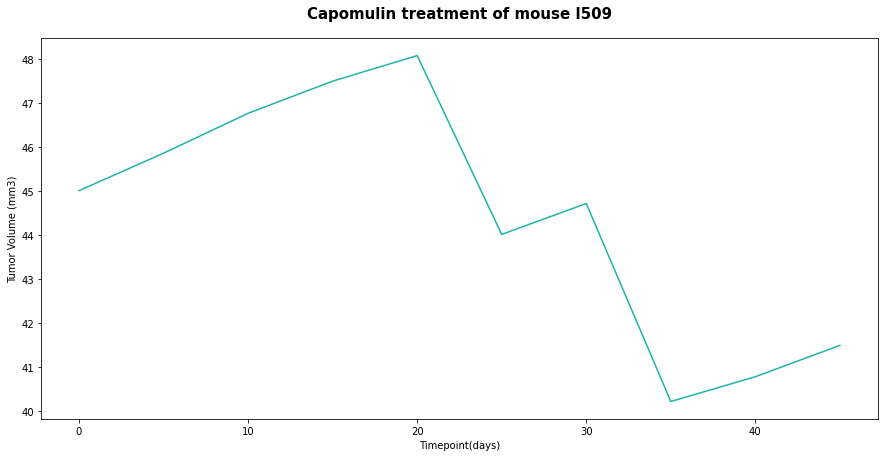

In [171]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
plt.figure(figsize=(15,7))
l509_df=clean_df.loc[(clean_df['Drug Regimen']=='Capomulin')&(clean_df['Mouse ID']=='l509')][['Timepoint','Tumor Volume (mm3)']].set_index('Timepoint')
plt.plot(l509_df.index,l509_df,color='lightseagreen')
plt.title('Capomulin treatment of mouse l509',fontsize= 15,pad=20,fontweight="bold")
plt.xlabel('Timepoint(days)')
plt.ylabel('Tumor Volume (mm3)')

Text(0.5, 1.0, 'Average tumor volume vs. mouse weight for Capomulin regimen ')

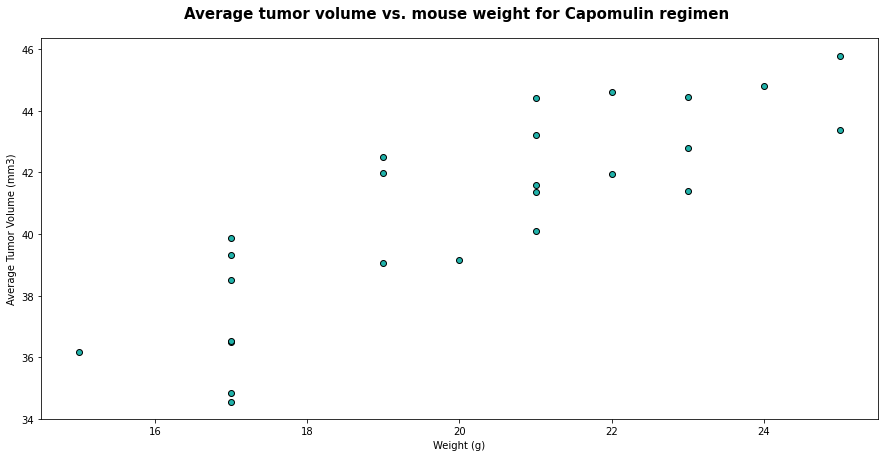

In [169]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
Capomulin_df=clean_df.loc[clean_df['Drug Regimen']=='Capomulin'].groupby('Mouse ID').mean()
plt.figure(figsize=(15,7))
plt.scatter(Capomulin_df['Weight (g)'],Capomulin_df['Tumor Volume (mm3)'], facecolors="lightseagreen", edgecolors="black" )
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Average tumor volume vs. mouse weight for Capomulin regimen ',fontsize= 15,pad=20,fontweight="bold")


## Correlation and Regression

The correlation between average_tumor and mouse weight for Capomulin is 0.842
The r-squared is: 0.7088568047708717




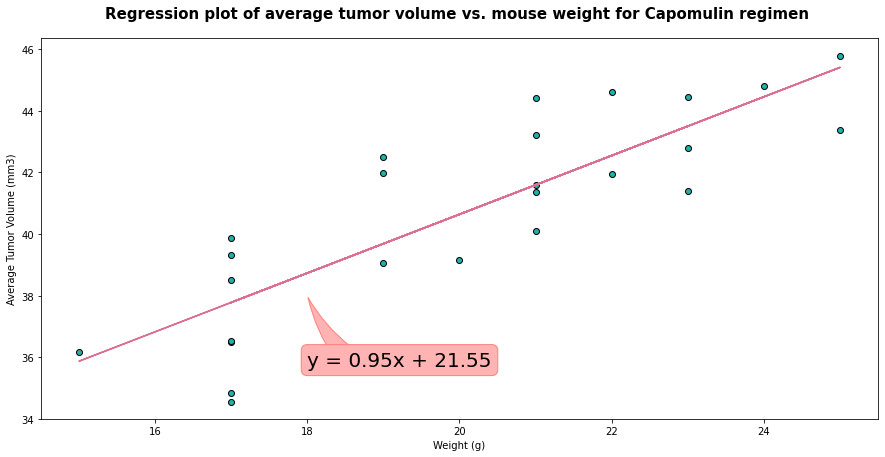

In [193]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x_val=Capomulin_df['Weight (g)']
y_val=Capomulin_df['Tumor Volume (mm3)']
Correlation=st.pearsonr(x_val,y_val)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val,y_val)
reress_values=x_val* slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The correlation between average_tumor and mouse weight for Capomulin is {round(Correlation[0],3)}")
print(f"The r-squared is: {rvalue**2}\n")
print("")
plt.figure(figsize=(15,7))
plt.scatter(x_val,y_val, facecolors="lightseagreen", edgecolors="black" )
plt.plot(x_val,reress_values,"palevioletred")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Regression plot of average tumor volume vs. mouse weight for Capomulin regimen ',fontsize= 15,pad=20,fontweight="bold")
plt.annotate(line_eq, xy=(18, 38), xycoords='data',xytext=(0, -70), textcoords='offset points',size=20,
            bbox=dict(boxstyle="round",
                      fc=(1.0, 0.7, 0.7),
                      ec=(1., .5, .5)),
            arrowprops=dict(arrowstyle="wedge,tail_width=1.",
                            fc=(1.0, 0.7, 0.7), ec=(1., .5, .5),
                            patchA=None,
                            patchB=None,
                            relpos=(0.2, 0.8),
                            connectionstyle="arc3,rad=-0.1"))
plt.show()